# # This dataset is about house rents in islamabad
location:location of house in islamabad

Area: area of house in Marla

Bedroom:Number of bedrooms in the house

Baths: number of bathrooms in the house

Price: Price of house in pakistani rupee (pkr)

In [1]:
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# store the dataset in house variable
house=pd.read_csv("C:\\Users\\anujr\\OneDrive\\Documents\\data analyst\\raw data\\House_for_rent_islamabad_pk.csv")

In [3]:
house.head()

,Unnamed: 0,Location,Area,Bedrooms,Baths,Price
0,0,F-8,26.0,4.0,5.0,420000
1,1,DHA,11.0,3.0,4.0,100000
2,2,F-8,26.0,4.0,5.0,650000
3,3,F-6,20.0,6.0,6.0,450000
4,4,D-17,10.0,9.0,6.0,120000


In [4]:
house=house.drop(columns=house.columns[0],axis=1)

In [5]:
house.head()

,Location,Area,Bedrooms,Baths,Price
0,F-8,26.0,4.0,5.0,420000
1,DHA,11.0,3.0,4.0,100000
2,F-8,26.0,4.0,5.0,650000
3,F-6,20.0,6.0,6.0,450000
4,D-17,10.0,9.0,6.0,120000


In [6]:
house.shape # there are 3899 observations and 5 columns

(3899, 5)

In [7]:
house.info() # 3 columns having float datatype , location have object and price have int datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  3899 non-null   object 
 1   Area      3899 non-null   float64
 2   Bedrooms  3762 non-null   float64
 3   Baths     3616 non-null   float64
 4   Price     3899 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 152.4+ KB


In [8]:
house.describe() # it gives a short summary about dataset

,Area,Bedrooms,Baths,Price
count,3899.000000,3762.00000,3616.000000,3.899000e+03
mean,22.544883,5.14487,5.111449,4.950650e+05
std,84.336261,1.66992,1.148465,6.327347e+05
min,0.900000,1.00000,1.000000,0.000000e+00
25%,10.000000,4.00000,4.000000,1.200000e+05
50%,20.000000,5.00000,6.000000,2.500000e+05
75%,24.000000,6.00000,6.000000,6.500000e+05
max,4500.000000,11.00000,10.000000,8.000000e+06


In [9]:
# handling missing values

<Axes: >

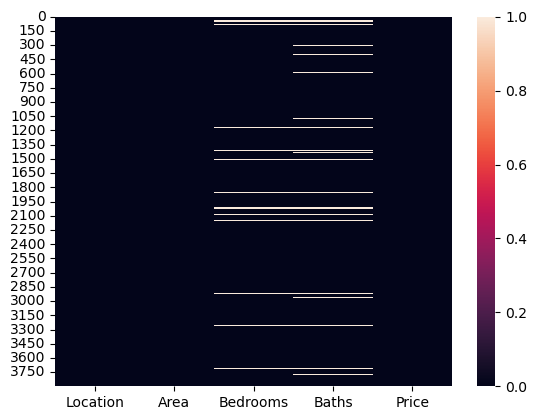

In [10]:
sns.heatmap(house.isnull())

In [11]:
house.isnull().sum()

Location      0
Area          0
Bedrooms    137
Baths       283
Price         0
dtype: int64

In [12]:
(420/3899)*100 # in our dataset 10 percent data having null values

10.771992818671453

(array([  15.,   90.,  289.,  574.,  804., 1825.,    5.,    9.,    2.,
           3.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

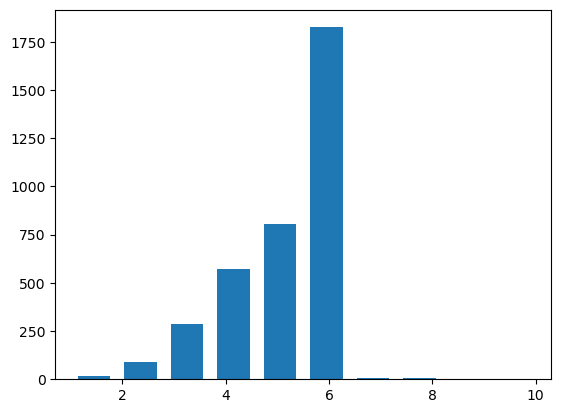

In [13]:
plt.hist(house["Baths"],rwidth=0.7)

(array([ 10., 109., 397., 846., 973., 902., 238., 120.,  57., 110.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

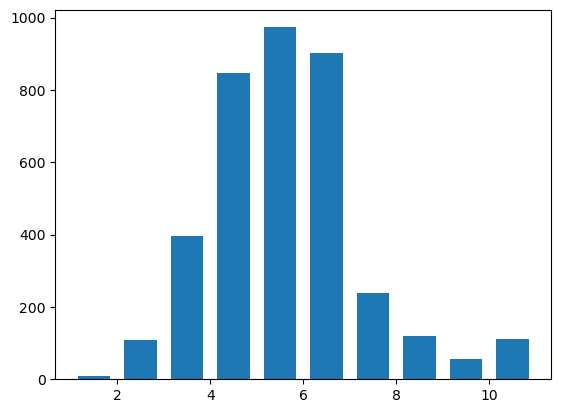

In [14]:
plt.hist(house['Bedrooms'],rwidth=0.7)

In [15]:
mean_by_location=house.groupby('Location')["Baths"].transform('median')

In [16]:
mean_by_location=mean_by_location.round() 
mean_by_location


0       6.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
3894    6.0
3895    6.0
3896    6.0
3897    5.0
3898    6.0
Name: Baths, Length: 3899, dtype: float64

In [17]:
house['Baths'].fillna(mean_by_location,inplace=True) # replacing fill na value with mean according to their locations


In [18]:
house.isnull().sum()

Location      0
Area          0
Bedrooms    137
Baths         2
Price         0
dtype: int64

In [19]:
mean_by_location2=house.groupby('Location')["Bedrooms"].transform('mean')

In [20]:
mean_by_location2=mean_by_location2.round()

In [21]:
house.head()

,Location,Area,Bedrooms,Baths,Price
0,F-8,26.0,4.0,5.0,420000
1,DHA,11.0,3.0,4.0,100000
2,F-8,26.0,4.0,5.0,650000
3,F-6,20.0,6.0,6.0,450000
4,D-17,10.0,9.0,6.0,120000


In [22]:
house['Bedrooms'].fillna(mean_by_location2,inplace=True) # replacing fill na value with mean according to their locations

In [23]:
house.isnull().sum()

Location    0
Area        0
Bedrooms    2
Baths       2
Price       0
dtype: int64

In [24]:
house[house.isnull().any(axis=1)]

,Location,Area,Bedrooms,Baths,Price
826,E-16,8.0,NaN,NaN,60000
829,E-16,10.0,NaN,NaN,35000


In [25]:
house["Location"].value_counts()

F-7                   440
DHA                   412
F-8                   374
Bahria                298
G-13                  275
                     ... 
I-13                    1
Gulshan-e-Khudadad      1
Taramrri                1
G-12                    1
Lehtarar                1
Name: Location, Length: 71, dtype: int64

In [26]:
house.dropna(inplace=True)

In [27]:
house.isnull().sum() # there is no null values

Location    0
Area        0
Bedrooms    0
Baths       0
Price       0
dtype: int64

In [28]:
# check for duplicate values
# there is no duplicate values

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5531f69d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a553a9b090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a553a98e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a553aa4750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a55331a550>],
 'means': []}

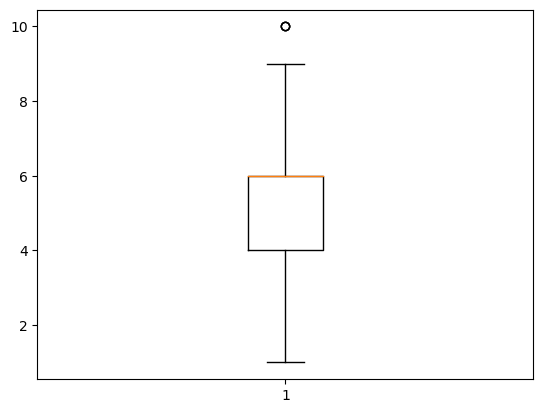

In [29]:
plt.boxplot(x=house["Baths"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a553afc690>,
 'caps': [<matplotlib.lines.Line2D at 0x1a553afdbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a553af3a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a553aff310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a553affdd0>],
 'means': []}

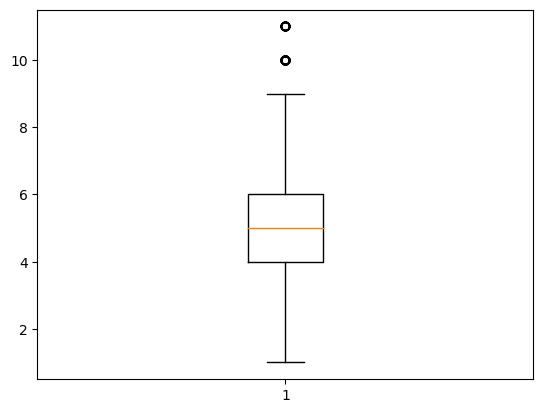

In [30]:
plt.boxplot(x=house["Bedrooms"])

In [31]:
house[house["Price"]==0] # want to remove this rows 

,Location,Area,Bedrooms,Baths,Price
925,Bahria,10.0,5.0,6.0,0
3170,Bahria,10.0,5.0,6.0,0
3247,Gulberg,7.0,4.0,4.0,0


In [32]:
house=house[house["Price"]!=0]

In [33]:
#change datatype
house["Baths"]=house["Baths"].astype(int)

In [34]:
house["Bedrooms"]=house["Bedrooms"].astype(int)

In [35]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 0 to 3898
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  3894 non-null   object 
 1   Area      3894 non-null   float64
 2   Bedrooms  3894 non-null   int32  
 3   Baths     3894 non-null   int32  
 4   Price     3894 non-null   int64  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 152.1+ KB


(array([  10.,  109.,  397.,  892., 1018.,  941.,  240.,  120.,   57.,
         110.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

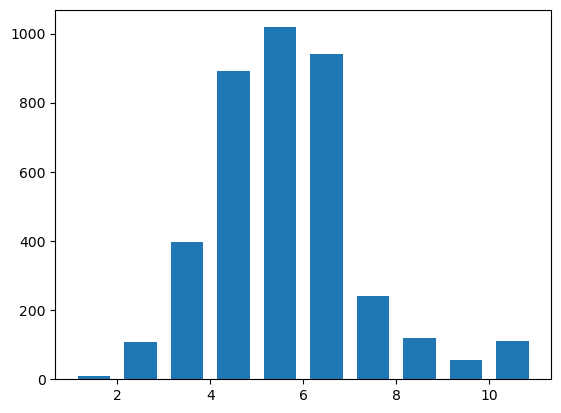

In [36]:
plt.hist(house["Bedrooms"],rwidth=0.7)

(array([1.500e+01, 9.000e+01, 2.920e+02, 5.850e+02, 8.810e+02, 2.012e+03,
        5.000e+00, 9.000e+00, 2.000e+00, 3.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

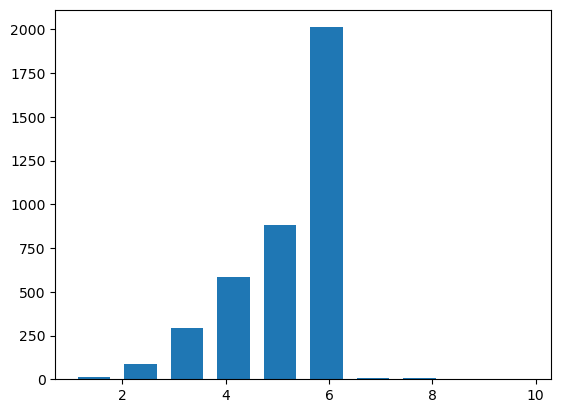

In [37]:
plt.hist(house["Baths"],rwidth=0.7)

In [38]:
# Our data is cleaned ..Now analyze the data

In [39]:
sum_loc=house.groupby(["Location"],as_index=False)["Price"].sum().sort_values(by="Price",ascending=False)

In [40]:
sum_loc_head=sum_loc.head(15)

In [41]:
max_loc=house.groupby(["Location"],as_index=False)["Price"].max().sort_values(by="Price",ascending=False)

In [42]:
max_loc_head=max_loc.head(15)

In [43]:
min_loc=house.groupby(["Location"],as_index=False)["Price"].max().sort_values(by="Price",ascending=True)

In [44]:
min_loc_head=min_loc.head(15)

<Axes: xlabel='Location', ylabel='Price'>

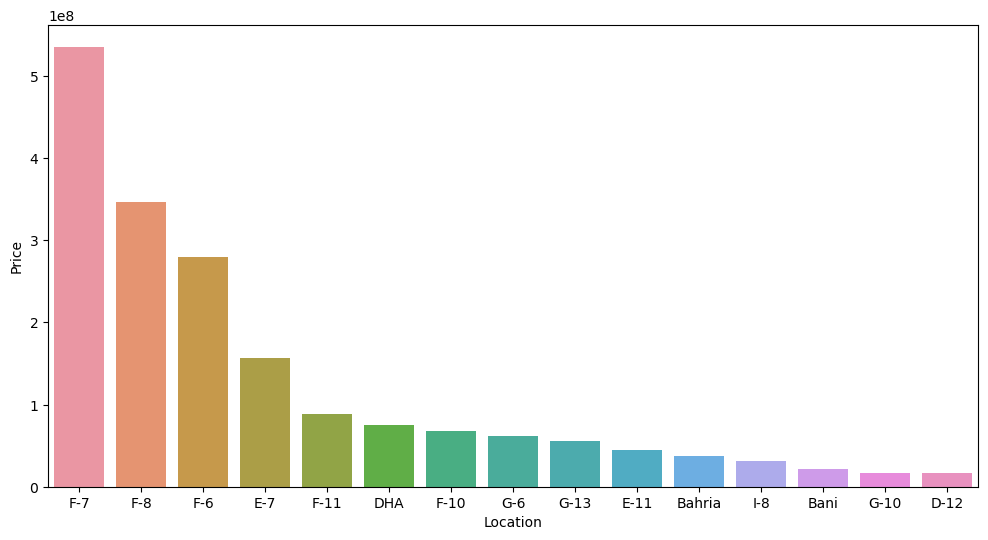

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x='Location',y="Price",data=sum_loc_head)


<Axes: xlabel='Location', ylabel='Price'>

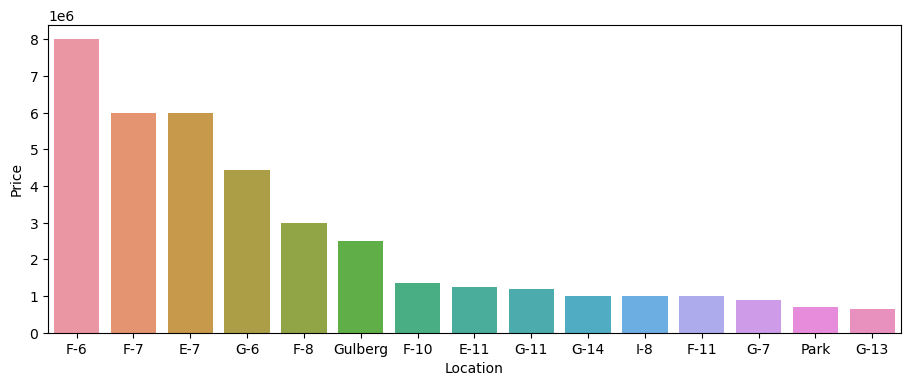

In [46]:
plt.figure(figsize=(11,4))
sns.barplot(x='Location',y="Price",data=max_loc_head)

<Axes: xlabel='Location', ylabel='Price'>

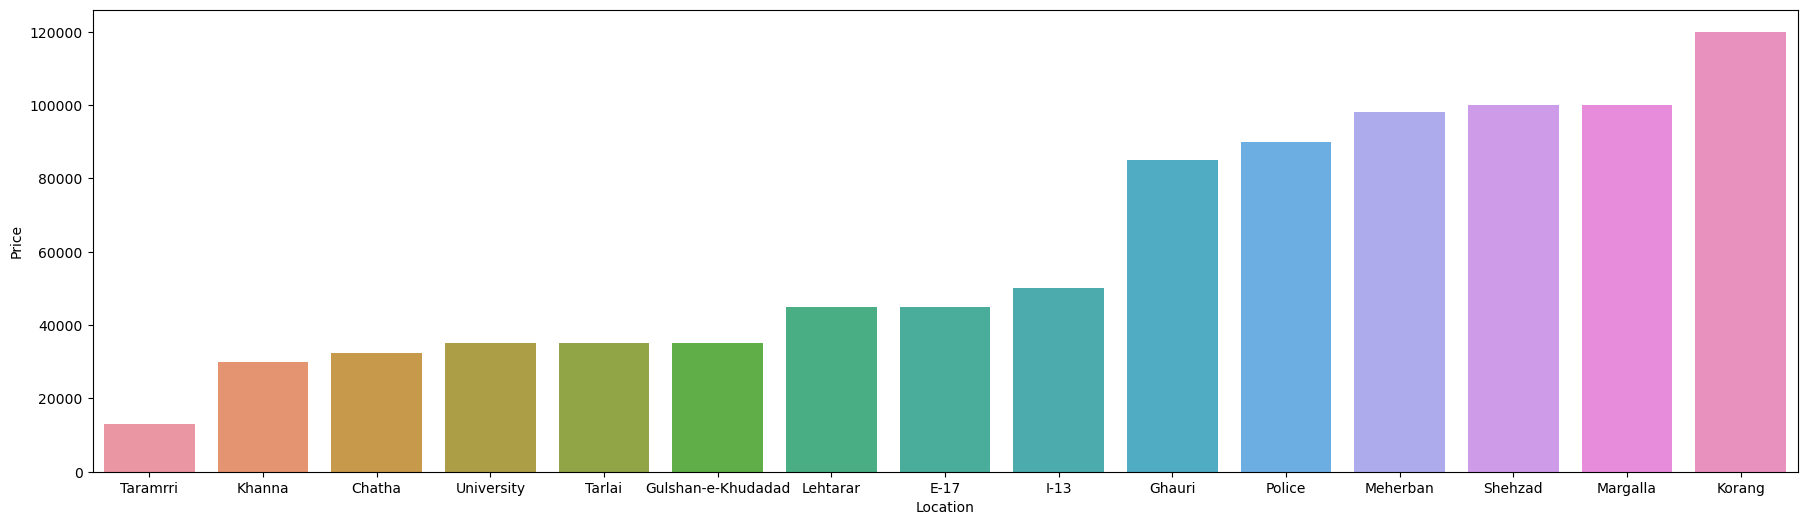

In [47]:
plt.figure(figsize=(22,6))
sns.barplot(x='Location',y="Price",data=min_loc_head)

In [48]:
house.max()

Location      Zaraj
Area         4500.0
Bedrooms         11
Baths            10
Price       8000000
dtype: object

In [49]:
house.min()

Location    B-17
Area         0.9
Bedrooms       1
Baths          1
Price       9000
dtype: object

In [50]:
house["Price"].mean()

495676.2565485362

In [51]:
max_buyer=house["Location"].value_counts()
max_buyer.head(15)

F-7       440
DHA       412
F-8       374
Bahria    296
G-13      275
F-6       258
F-11      189
Bani      178
E-11      140
F-10      138
E-7       124
I-8        96
D-12       92
G-10       80
G-11       78
Name: Location, dtype: int64

# Creating machine learning


In [52]:
house_ml=pd.get_dummies(house)

In [118]:
house_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 0 to 3898
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         3894 non-null   float64
 1   Bedrooms                     3894 non-null   int32  
 2   Baths                        3894 non-null   int32  
 3   Price                        3894 non-null   int64  
 4   Location_B-17                3894 non-null   uint8  
 5   Location_Bahria              3894 non-null   uint8  
 6   Location_Bani                3894 non-null   uint8  
 7   Location_Bhara               3894 non-null   uint8  
 8   Location_CBR                 3894 non-null   uint8  
 9   Location_Capital             3894 non-null   uint8  
 10  Location_Chak                3894 non-null   uint8  
 11  Location_Chatha              3894 non-null   uint8  
 12  Location_Constitution        3894 non-null   uint8  
 13  Location_D-12     

In [119]:
house_ml['Location_Top']=house_ml['Location_Top'].astype(int)

In [130]:
house_ml=house_ml.astype(int)

In [131]:
house_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 0 to 3898
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Area                         3894 non-null   int32
 1   Bedrooms                     3894 non-null   int32
 2   Baths                        3894 non-null   int32
 3   Price                        3894 non-null   int32
 4   Location_B-17                3894 non-null   int32
 5   Location_Bahria              3894 non-null   int32
 6   Location_Bani                3894 non-null   int32
 7   Location_Bhara               3894 non-null   int32
 8   Location_CBR                 3894 non-null   int32
 9   Location_Capital             3894 non-null   int32
 10  Location_Chak                3894 non-null   int32
 11  Location_Chatha              3894 non-null   int32
 12  Location_Constitution        3894 non-null   int32
 13  Location_D-12                3894 non-null   int

In [132]:
house_ml.head(10)

,Area,Bedrooms,Baths,Price,Location_B-17,Location_Bahria,Location_Bani,Location_Bhara,Location_CBR,Location_Capital,...,Location_Police,Location_Shah,Location_Shehzad,Location_Soan,Location_Taramrri,Location_Tarlai,Location_Tarnol,Location_Top,Location_University,Location_Zaraj
0,26,4,5,420000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,3,4,100000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,4,5,650000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,6,6,450000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,9,6,120000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,4,5,70000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,20,4,5,350000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,40,5,6,2900000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,6,6,280000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,5,6,275000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
x=house_ml.drop(["Price"],axis=1)

In [134]:
y=house_ml["Price"]

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [137]:
from sklearn.linear_model import LinearRegression
lc=LinearRegression()

In [138]:
lc.fit(x_train,y_train)

LinearRegression()

In [139]:
lc.score(x_test,y_test)

0.5922106882136295

In [140]:
from sklearn.ensemble import  RandomForestRegressor

In [141]:
rr=RandomForestRegressor()

In [142]:
rr.fit(x_train,y_train)

RandomForestRegressor()

In [143]:
rr.score(x_test,y_test)

0.815414791081962

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
dr=DecisionTreeRegressor(criterion='squared_error')

In [146]:
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [147]:
dr.score(x_test,y_test)

0.7174114943177625

In [148]:
from sklearn.neighbors import KNeighborsRegressor

In [149]:
knr=KNeighborsRegressor(n_neighbors=5)

In [150]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [151]:
knr.score(x_test,y_test)

0.7488537147579742

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
sc=StandardScaler()

In [154]:
sc.fit(x_train)

StandardScaler()

In [155]:
train_sc=sc.transform(x_train)

In [156]:
test_sc=sc.transform(x_test)

In [157]:
train_sc=pd.DataFrame(train_sc)

In [158]:
train_sc

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.174355,1.728628,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
1,0.151605,1.122246,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
2,0.106645,1.122246,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
3,-0.140635,0.515863,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
4,-0.151875,-1.303284,-1.913423,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,-0.028235,3.547776,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
3111,-0.028235,-0.090519,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
3112,-0.028235,0.515863,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
3113,-0.028235,1.728628,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.096940,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383


In [159]:
test_sc=pd.DataFrame(test_sc)

In [160]:
test_sc

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.174355,-0.696902,-1.913423,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
1,-0.174355,-0.090519,-0.134756,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
2,0.039205,0.515863,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
3,-0.163115,-0.090519,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
4,-0.140635,0.515863,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,-0.163115,-0.696902,-1.024090,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
775,-0.140635,0.515863,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
776,-0.140635,-0.696902,-0.134756,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383
777,-0.095675,0.515863,0.754577,-0.119698,-0.288273,-0.228056,-0.01792,-0.035857,-0.01792,-0.035857,...,-0.01792,-0.01792,-0.035857,-0.09694,-0.01792,-0.01792,-0.01792,-0.091744,-0.025347,-0.05383


In [161]:
lc.fit(train_sc,y_train)
lc.score(test_sc,y_test)

0.5922143390102292

In [162]:
lc2=LinearRegression()

In [163]:
lc2.fit(train_sc,y_train)

LinearRegression()

In [164]:
lc2.score(test_sc,y_test)

0.5922143390102292

In [165]:
rr2=RandomForestRegressor()

In [166]:
rr2.fit(train_sc,y_train)

RandomForestRegressor()

In [167]:
rr2.score(train_sc,y_train)

0.8805832554692653

In [168]:
dr2=DecisionTreeRegressor()

In [169]:
dr2.fit(train_sc,y_train)

DecisionTreeRegressor()

In [170]:
dr2.score(train_sc,y_train)

0.9042574047212896

In [171]:
knr2=KNeighborsRegressor()

In [172]:
knr2.fit(train_sc,y_train)

KNeighborsRegressor()

In [173]:
knr2.score(train_sc,y_train)

0.7704023748245513

# before scaling random forest regressor gives highest accuracy and aftere scaling the data decision tree model gives highest accuracy and random forest model also..so for furthur analysis I use Decision tree regressor

In [174]:
actual_pred=rr2.predict(test_sc)

In [175]:
y_test

1931     90000
2535     85000
3380    700000
2816     98000
2044    229999
         ...  
3891    180000
2543    265000
637     140000
151     310000
2400    350000
Name: Price, Length: 779, dtype: int32

In [176]:
dr2.predict([test_sc.iloc[1,:]])

array([52500.])

In [177]:
rr2.predict([test_sc.iloc[1,:]])

array([73630.])

In [178]:
rr.predict([test_sc.iloc[1,:]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([46781.78571429])

In [179]:
from sklearn.metrics import mean_squared_error , r2_score

In [180]:
mse=mean_squared_error(actual_pred,y_test)

In [181]:
mse

77510092689.2494

In [182]:
rmse=nm.sqrt(mse)

In [183]:
rmse

278406.3445563865

In [184]:
r2_score(actual_pred,y_test)

0.7904160801177516

In [185]:
actual_val=rr.predict(test_sc)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [186]:
r2_score(y_test,actual_val)

-0.2580541575197628

In [187]:
mse=mean_squared_error(actual_val,y_test)

In [188]:
rmse=nm.sqrt(mse)

In [189]:
rmse

703659.0912999016

In [190]:
#now for rr without scaling

In [191]:
predict_rr_without_sc=rr.predict(test_sc)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [192]:
r2_score(y_test,predict_rr_without_sc)

-0.2580541575197628

In [193]:
prediction_Acc=pd.DataFrame(dr2.predict(test_sc))

In [194]:
prediction_Acc.round()

,0
0,90000.0
1,52500.0
2,858000.0
3,80000.0
4,209595.0
...,...
774,160000.0
775,250000.0
776,134333.0
777,310128.0


In [195]:
y_test

1931     90000
2535     85000
3380    700000
2816     98000
2044    229999
         ...  
3891    180000
2543    265000
637     140000
151     310000
2400    350000
Name: Price, Length: 779, dtype: int32

In [196]:
import pickle

In [197]:
pickle.dump(dr2,open("house_pred_islama_ml_model.pkl",'wb'))

In [208]:
x_test.iloc([0,])

TypeError: unhashable type: 'list'